In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

# source: https://www.geo.fu-berlin.de/en/v/soga-py/Advanced-statistics/time-series-analysis/Time-series-statistical-models/Moving-Average-models/index.html#:~:text=The%20moving%20average%20process%20is,at%20lags%20greater%20than%20q%20.&text=We%20already%20got%20to%20know,to%20calculate%20moving%20average%20series.&text=Another%2C%20very%20convenient%20way%20to,to%20use%20the%20class%20statsmodels.

Source: Rudolph, A., Krois, J., Hartmann, K. (2023): Statistics and Geodata Analysis using Python (SOGA-Py). Department of Earth Sciences, Freie Universitaet Berlin.

In [ ]:
random.seed(250)

# Creating white noise series
mean = 0
std = 1
n = 200
w = np.random.normal(mean, std, size=n)
print(w)
## Moving Average
plt.figure(figsize=(18,6))
plt.plot(w)
plt.title("Moving Average Series", fontsize=14)
plt.xlabel("Time", fontsize=14)
plt.show()

w_series = pd.Series(w) # Convert array of integeres to pandas series

window_size = 3
windows = w_series.rolling(window_size)

moving_averages = windows.mean() # Create a series of moving averages of each window
plt.figure(figsize=(18,6))
plt.plot(moving_averages)
plt.title("Moving Average Series", fontsize=14)
plt.xlabel("Time", fontsize=14)
plt.show()

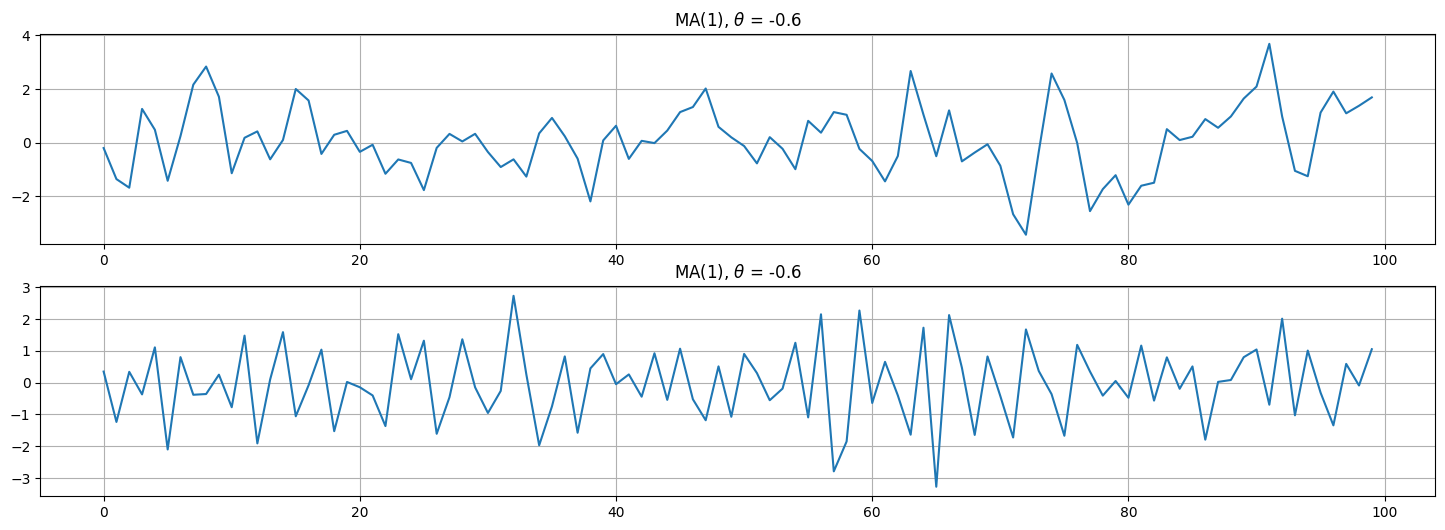

In [9]:
from statsmodels.tsa.arima_process import ArmaProcess

# MA parameter: 0.6
ar1 = np.array([1]) # We must include the zero-lag coefficient of 1
ma1 = np.array([1, +0.6])
MA_object1 = ArmaProcess(ar1, ma1)
simulated_ma1_1 = MA_object1.generate_sample(nsample=100)

# MA parameter: -0.6
ar2 = np.array([1])
ma2 = np.array([1, -0.6])
MA_object2 = ArmaProcess(ar2, ma2)
simulated_ma1_2 = MA_object2.generate_sample(nsample=100)

fig, ax = plt.subplots(2, 1, figsize=(18, 6))
ax[0].plot(simulated_ma1_1)
ax[0].set_title("MA(1), $\\theta$ = -0.6")

ax[1].plot(simulated_ma1_2)
ax[1].set_title("MA(1), $\\theta$ = -0.6")

ax[0].grid()
ax[1].grid()
plt.show()

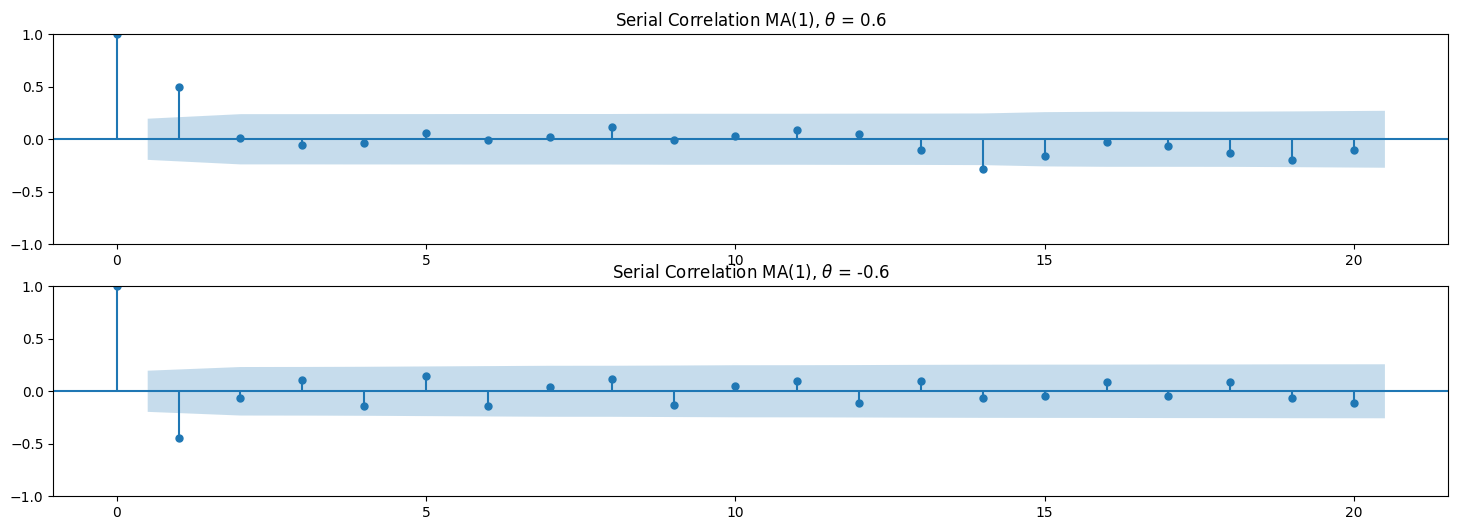

In [10]:
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(2, 1, figsize=(18,6))

plot_acf(simulated_ma1_1, ax=ax[0])
ax[0].set_title("Serial Correlation MA(1), $\\theta$ = 0.6")

plot_acf(simulated_ma1_2, ax=ax[1])
ax[1].set_title("Serial Correlation MA(1), $\\theta$ = -0.6")

plt.show()